<a href="https://colab.research.google.com/github/RaunakRaj2081/MACHINE_LEARNING_PROJECTS/blob/main/3_Spam_Mail_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

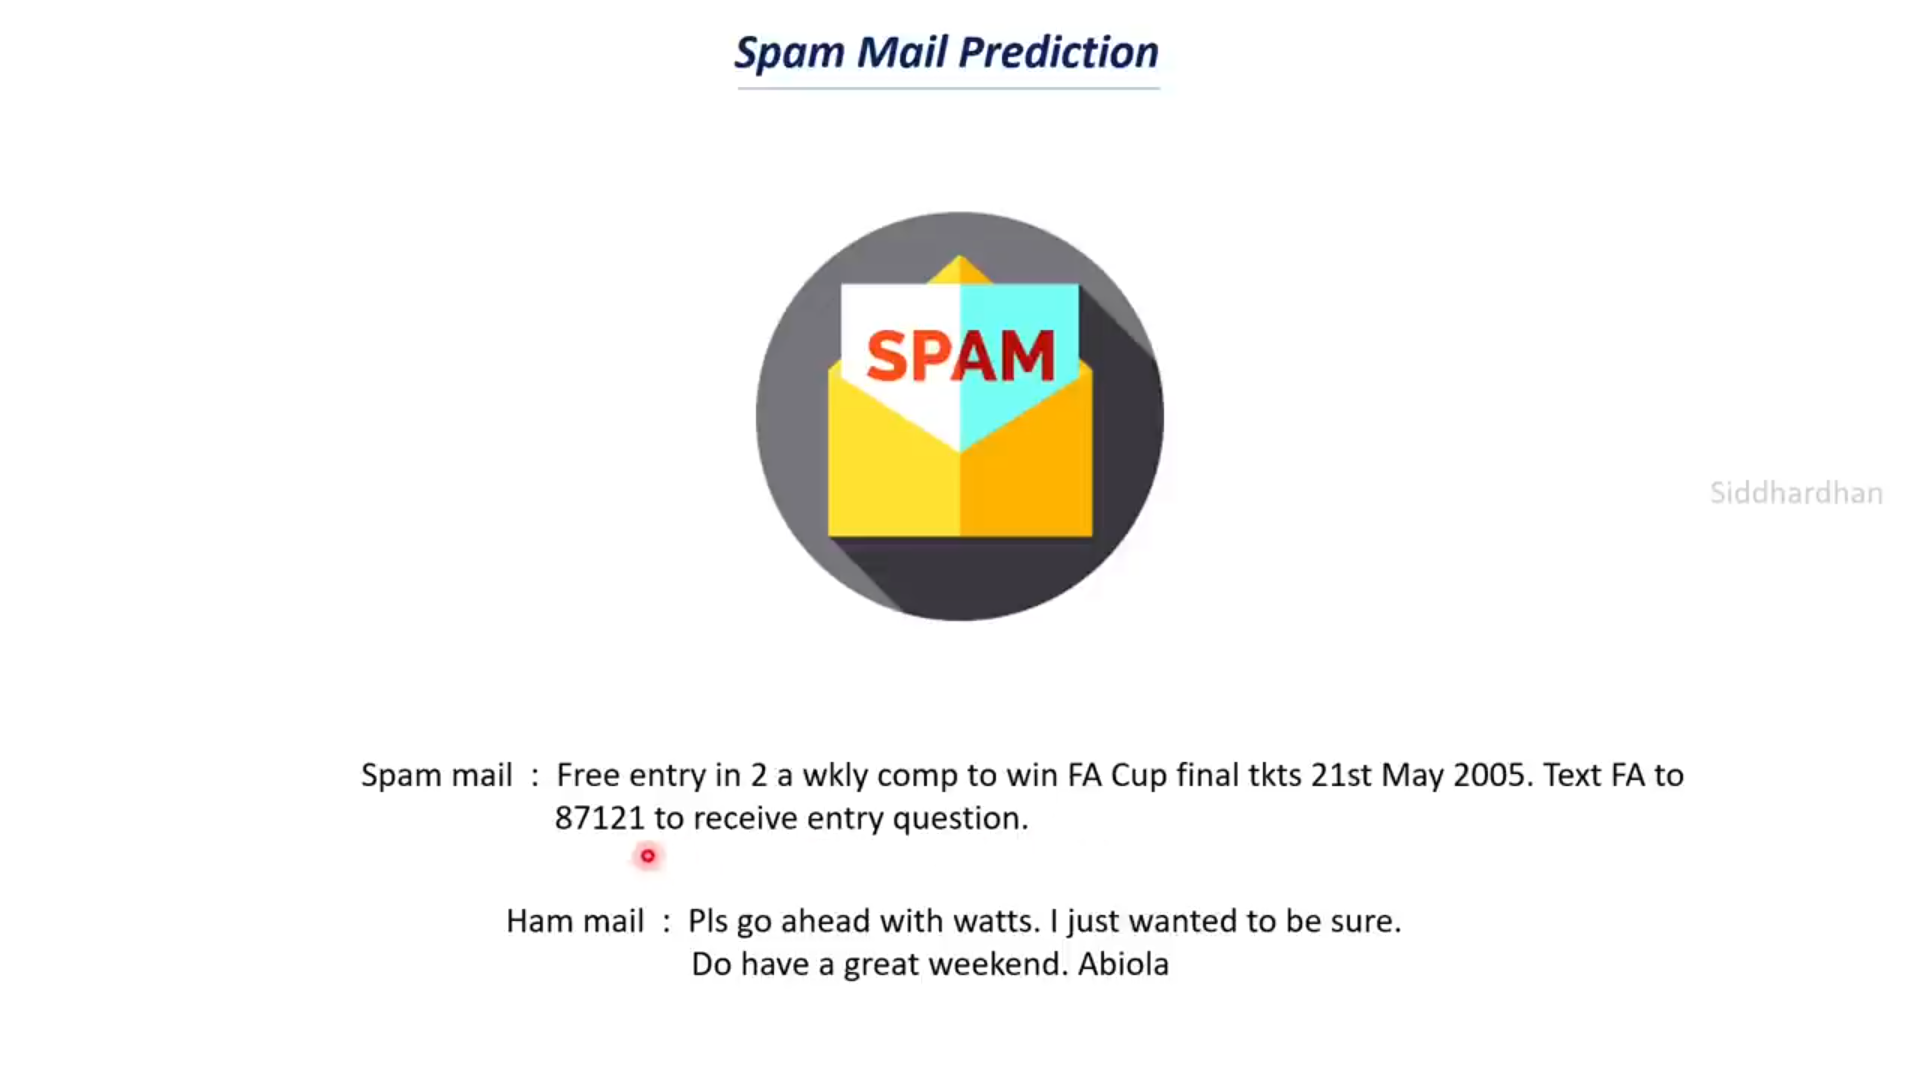

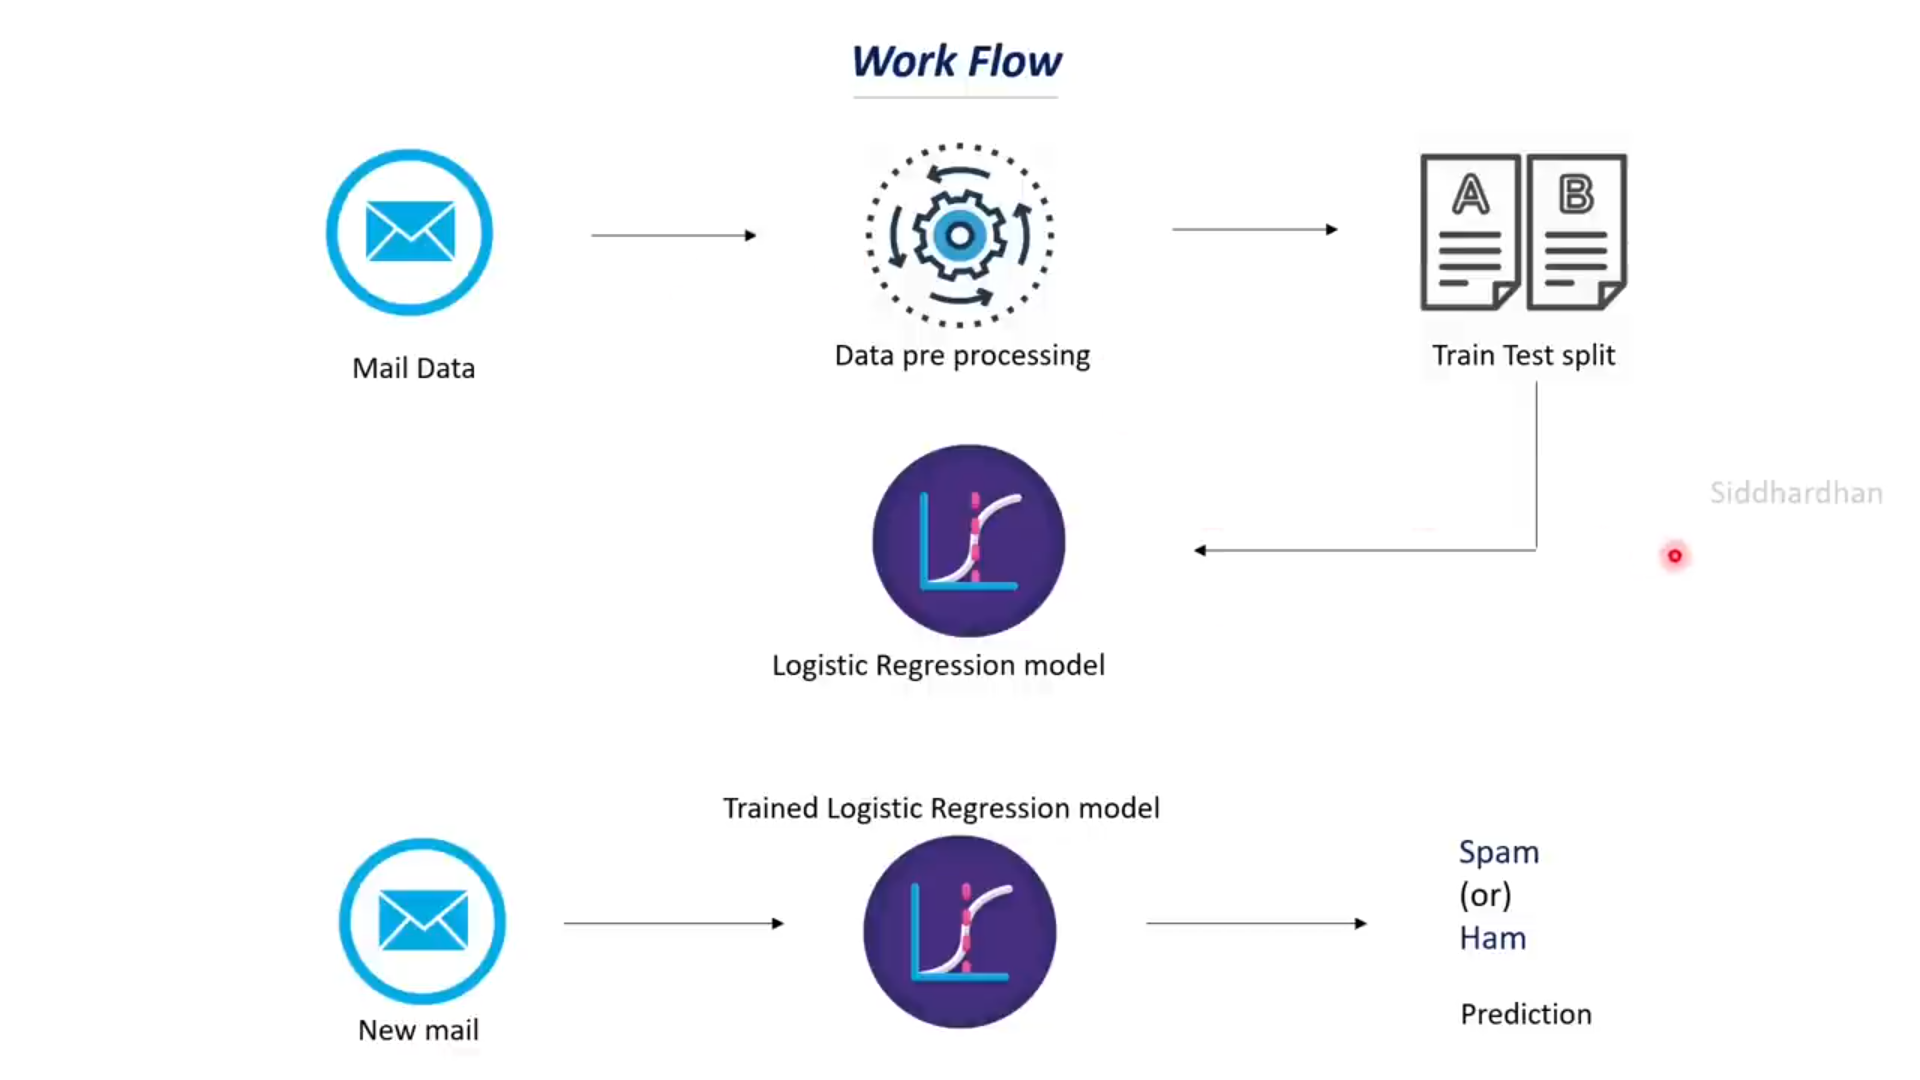

#📘 Spam Mail Prediction using Machine Learning (Logistic Regression)

✅ 1. Introduction to Spam Mail Prediction

=> Spam mail prediction is a binary classification problem where the goal is to detect whether a given email is:

Spam (1) or

Not Spam (0)

It helps in filtering unwanted or harmful emails using machine learning algorithms. One of the most commonly used algorithms for this task is Logistic Regression.


✅ 2. What is Logistic Regression?

=> Logistic Regression is a supervised learning algorithm used for binary classification.

It predicts the probability that a given input belongs to a particular class (e.g., spam or not spam).

It uses the sigmoid function to output values between 0 and 1.


✅ 3. Dataset Used

A spam mail dataset contains:

Text content of emails

Labels: 1 for spam, 0 for not spam

Example dataset: SMS Spam Collection, Enron Email Dataset, etc.

✅ 4. Steps in Spam Mail Prediction using Logistic Regression

a. Data Collection

=>Gather a labeled dataset of emails (spam and ham).

b. Data Preprocessing

=> Convert text into lowercase

Remove punctuation, numbers, and stopwords

Perform tokenization and stemming/lemmatization

c. Feature Extraction

=> Convert text into numerical features using:

Bag of Words (BoW)

TF-IDF (Term Frequency–Inverse Document Frequency)

d. Train-Test Split

=> Split the dataset into training and testing sets to evaluate performance.

e. Model Training

=> Train the logistic regression model using the training data.

f. Model Prediction

=> Predict whether new or test emails are spam or not.

g. Model Evaluation

=> Use metrics like accuracy, precision, recall, F1-score, and confusion matrix.

✅ 5. Why Logistic Regression is Suitable for Spam Detection

Easy to implement and fast to train

Works well for linearly separable classes

Gives probability output, which is useful for email filtering

Performs well with high-dimensional sparse text data



#Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data Collection & Pre-Processing

In [2]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

🔍 Explanation Step-by-Step:

1. raw_mail_data

This is your original dataset (maybe a DataFrame that contains email text and labels).

2. pd.notnull(raw_mail_data)

This checks where the values in raw_mail_data are not null (i.e., not missing). It returns a True/False table of the same shape.

3. .where(condition, other)

This function keeps the original value if the condition is True, and replaces it with other if the condition is False.

So this line means:
👉 "Keep all values that are not null, and replace all null (missing) values with an empty string."



In [5]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

#Label Encoding

In [7]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

It changes the text labels in the 'Category' column from 'spam' and 'ham' to 0 and 1, respectively.

spam - 0

ham - 1

In [8]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [9]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


#Splitting the data into training data & test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [12]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


#Feature Extraction

In [15]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [16]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [17]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

# Training the model using Logistic Regression

In [18]:
model = LogisticRegression()

In [19]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

#Evaluating the trained model

In [20]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [21]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [22]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [23]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


#Building a Predictive System

In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
